In [2]:
import pandas as pd
# 파일을 DataFrame으로 읽어오는 코드 예시
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")

/tmp/ipykernel_1658473/3446982169.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ")


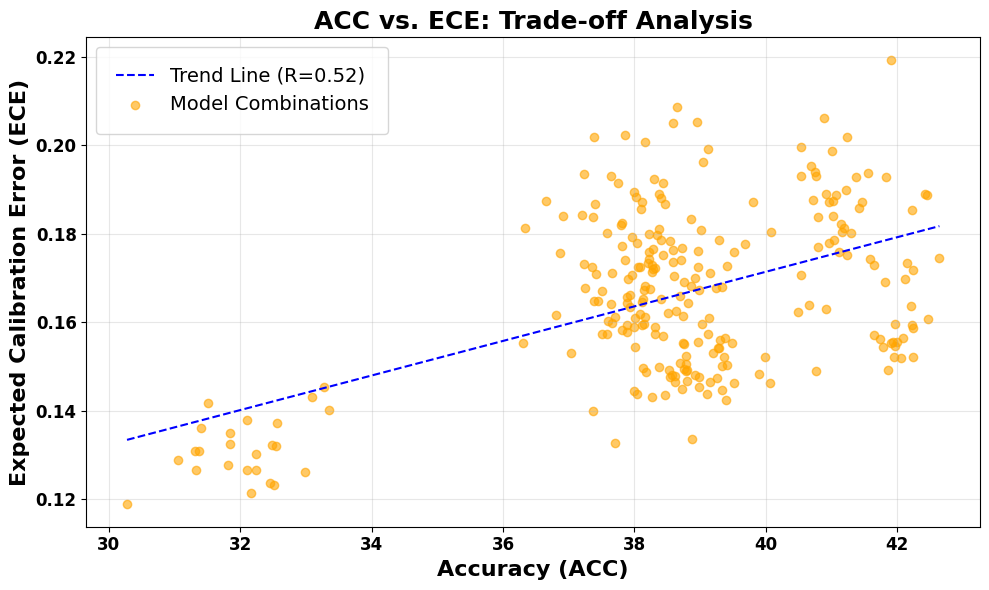

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 데이터 준비
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)

# 정규화 및 조화평균 계산
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# Scatter Plot 생성
plt.figure(figsize=(10, 6))
plt.scatter(df["ACC Mean"], df["ECE Mean"], alpha=0.6, label="Model Combinations", color="orange")

# 트렌드 경향선 추가 (회귀 분석)
slope, intercept, r_value, _, _ = linregress(df["ACC Mean"], df["ECE Mean"])
x_vals = np.linspace(df["ACC Mean"].min(), df["ACC Mean"].max(), 100)  # ACC Mean 범위
trend_line = slope * x_vals + intercept
plt.plot(x_vals, trend_line, color="blue", linestyle="--", label=f"Trend Line (R={r_value:.2f})")

# 그래프 설정
plt.title("ACC vs. ECE: Trade-off Analysis", fontsize=18, fontweight="bold")
plt.xlabel("Accuracy (ACC)", fontsize=16, fontweight="bold")
plt.ylabel("Expected Calibration Error (ECE)", fontsize=16, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend(fontsize=14, loc="upper left", frameon=True, framealpha=0.8, borderpad=1)

# X축과 Y축 눈금 라벨 스타일 조정
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

plt.tight_layout()

# 그래프 표시
plt.show()
